In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("FIFATheBest.csv")

In [5]:
df.dtypes

Role       object
Country    object
Name       object
First      object
Second     object
Third      object
dtype: object

In [6]:
df.shape

(502, 6)

In [7]:
df.columns

Index(['Role', 'Country', 'Name', 'First', 'Second', 'Third'], dtype='object')

In [8]:
df.head()

,Role,Country,Name,First,Second,Third
0,Captain,Afghanistan,Fareed Sadat,Cristiano Ronaldo,Hazard Eden,Messi Lionel
1,Captain,Albania,Mavraj Mergim,Cristiano Ronaldo,Mané Sadio,Salah Mohamed
2,Captain,Algeria,Mahrez Riyad Karim,Messi Lionel,Mané Sadio,Salah Mohamed
3,Captain,American Samoa,Salapu Nicky,Cristiano Ronaldo,Salah Mohamed,Mané Sadio
4,Captain,Andorra,Lima Sola Ildefons,Mbappé Kylian,Van Dijk Virgil,Salah Mohamed


In [10]:
df['First'].nunique()

10

In [11]:
df.First.unique()

array(['Cristiano Ronaldo', 'Messi Lionel', 'Mbappé Kylian', 'Mané Sadio',
       'De Jong Frenkie', 'Hazard Eden', 'Van Dijk Virgil',
       'Salah Mohamed', 'De Ligt Matthijs', 'Kane Harry'], dtype=object)

1) Each player how many times in each rank (1,2,3)
2) Country wise voting

In [12]:
df.Country.nunique()

201

In [17]:
first_rank_counts = df.First.value_counts()
first_rank_counts

Van Dijk Virgil      153
Messi Lionel         135
Cristiano Ronaldo    108
Salah Mohamed         34
Mané Sadio            31
Mbappé Kylian         15
Hazard Eden            9
De Jong Frenkie        8
Kane Harry             6
De Ligt Matthijs       3
Name: First, dtype: int64

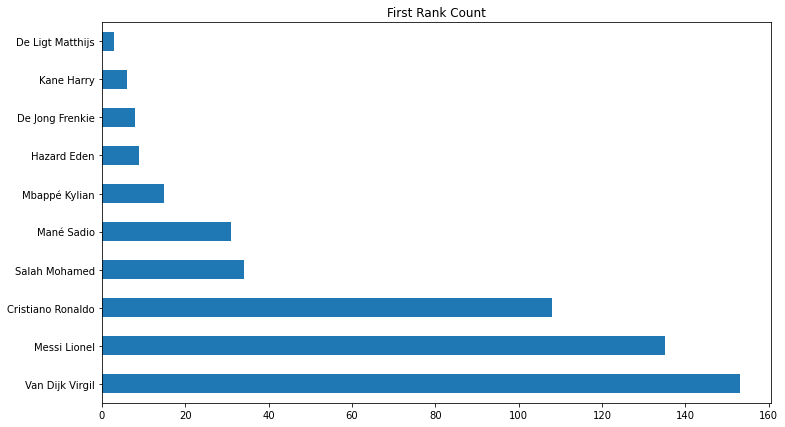

In [13]:
plt.figure(figsize=(12,7))
df.First.value_counts().plot.barh()
plt.title('First Rank Count')
plt.show()

In [18]:
second_rank_counts = df.Second.value_counts()
second_rank_counts

Messi Lionel         126
Cristiano Ronaldo     92
Van Dijk Virgil       86
Mané Sadio            44
Salah Mohamed         39
Mbappé Kylian         39
Hazard Eden           32
De Jong Frenkie       21
De Ligt Matthijs      17
Kane Harry             6
Name: Second, dtype: int64

In [19]:
third_rank_counts = df['Third'].value_counts()
third_rank_counts

Cristiano Ronaldo    85
Salah Mohamed        73
Mané Sadio           68
Messi Lionel         67
Van Dijk Virgil      65
Mbappé Kylian        46
Hazard Eden          37
De Jong Frenkie      27
De Ligt Matthijs     18
Kane Harry           16
Name: Third, dtype: int64

In [20]:
player_rank_count_df = pd.concat([first_rank_counts,second_rank_counts,third_rank_counts],
                                 axis=1,keys=['first_rank','second_rank','third_rank'])
player_rank_count_df

,first_rank,second_rank,third_rank
Van Dijk Virgil,153,86,65
Messi Lionel,135,126,67
Cristiano Ronaldo,108,92,85
Salah Mohamed,34,39,73
Mané Sadio,31,44,68
Mbappé Kylian,15,39,46
Hazard Eden,9,32,37
De Jong Frenkie,8,21,27
Kane Harry,6,6,16
De Ligt Matthijs,3,17,18


In [21]:
player_df = player_rank_count_df.copy()

5 points for first ranks, 3 points for second ranks, 1 point for third ranks

In [23]:
player_df['Total_Points'] = player_df['first_rank']*5 + player_df['second_rank']*3 + player_df['third_rank']*1
player_df

,first_rank,second_rank,third_rank,Total_Points
Van Dijk Virgil,153,86,65,1088
Messi Lionel,135,126,67,1120
Cristiano Ronaldo,108,92,85,901
Salah Mohamed,34,39,73,360
Mané Sadio,31,44,68,355
Mbappé Kylian,15,39,46,238
Hazard Eden,9,32,37,178
De Jong Frenkie,8,21,27,130
Kane Harry,6,6,16,64
De Ligt Matthijs,3,17,18,84


In [26]:
player_df = player_df.sort_values(by='Total_Points', ascending=False)
player_df

,first_rank,second_rank,third_rank,Total_Points
Messi Lionel,135,126,67,1120
Van Dijk Virgil,153,86,65,1088
Cristiano Ronaldo,108,92,85,901
Salah Mohamed,34,39,73,360
Mané Sadio,31,44,68,355
Mbappé Kylian,15,39,46,238
Hazard Eden,9,32,37,178
De Jong Frenkie,8,21,27,130
De Ligt Matthijs,3,17,18,84
Kane Harry,6,6,16,64


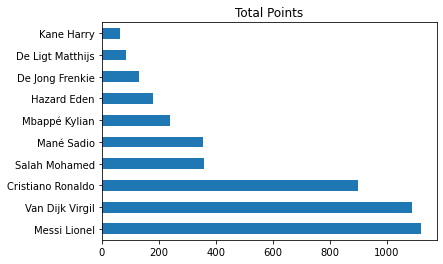

In [27]:
player_df['Total_Points'].plot.barh()
plt.title("Total Points")
plt.show()

In [28]:
df.Role.value_counts()

Coach      169
Captain    168
Media      165
Name: Role, dtype: int64

In [29]:
df.isna().sum()

Role       0
Country    0
Name       0
First      0
Second     0
Third      0
dtype: int64

In [30]:
duplicate_rows = df[df.duplicated()]
duplicate_rows

,Role,Country,Name,First,Second,Third


Countries from which coach, captain and media voted

In [32]:
countries = df['Country'].unique()
countries

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Argentina', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Bermuda', 'Bhutan', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Canada', 'Cape Verde Islands', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China PR',
       'Chinese Taipei', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador',
       'El Salvador', 'England', 'Eritrea', 'Estonia', 'Eswatini',
       'Faroe Islands', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia',
       'Germany', 'Ghana', 'Gibraltar', 'Greece', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Honduras', 'Hong Kong', 'Hungary', 'I

In [33]:
len(countries)

201

In [41]:
country_voter_details = {}
for country in countries:
    country_voter_details[country] = {'voters':[], 'unique_voters':0}   

In [42]:
country_voter_details

{'Afghanistan': {'voters': [], 'unique_voters': 0},
 'Albania': {'voters': [], 'unique_voters': 0},
 'Algeria': {'voters': [], 'unique_voters': 0},
 'American Samoa': {'voters': [], 'unique_voters': 0},
 'Andorra': {'voters': [], 'unique_voters': 0},
 'Angola': {'voters': [], 'unique_voters': 0},
 'Argentina': {'voters': [], 'unique_voters': 0},
 'Australia': {'voters': [], 'unique_voters': 0},
 'Austria': {'voters': [], 'unique_voters': 0},
 'Azerbaijan': {'voters': [], 'unique_voters': 0},
 'Bahamas': {'voters': [], 'unique_voters': 0},
 'Bahrain': {'voters': [], 'unique_voters': 0},
 'Bangladesh': {'voters': [], 'unique_voters': 0},
 'Barbados': {'voters': [], 'unique_voters': 0},
 'Belarus': {'voters': [], 'unique_voters': 0},
 'Belgium': {'voters': [], 'unique_voters': 0},
 'Bermuda': {'voters': [], 'unique_voters': 0},
 'Bhutan': {'voters': [], 'unique_voters': 0},
 'Bosnia and Herzegovina': {'voters': [], 'unique_voters': 0},
 'Botswana': {'voters': [], 'unique_voters': 0},
 'Br

In [43]:
for i in range(len(df)):
    role = df['Role'][i]
    country = df["Country"][i]
    if role not in country_voter_details[country]['voters']:
        country_voter_details[country]['unique_voters'] += 1
    country_voter_details[country]['voters'].append(role)

In [44]:
country_voter_details

{'Afghanistan': {'voters': ['Captain', 'Coach', 'Media'], 'unique_voters': 3},
 'Albania': {'voters': ['Captain', 'Coach', 'Media'], 'unique_voters': 3},
 'Algeria': {'voters': ['Captain', 'Coach', 'Media'], 'unique_voters': 3},
 'American Samoa': {'voters': ['Captain', 'Coach', 'Media'],
  'unique_voters': 3},
 'Andorra': {'voters': ['Captain', 'Coach', 'Media'], 'unique_voters': 3},
 'Angola': {'voters': ['Captain', 'Coach', 'Media'], 'unique_voters': 3},
 'Argentina': {'voters': ['Captain', 'Coach', 'Media'], 'unique_voters': 3},
 'Australia': {'voters': ['Captain', 'Coach'], 'unique_voters': 2},
 'Austria': {'voters': ['Captain', 'Coach', 'Media'], 'unique_voters': 3},
 'Azerbaijan': {'voters': ['Captain', 'Coach', 'Media'], 'unique_voters': 3},
 'Bahamas': {'voters': ['Captain', 'Coach'], 'unique_voters': 2},
 'Bahrain': {'voters': ['Captain', 'Coach', 'Media'], 'unique_voters': 3},
 'Bangladesh': {'voters': ['Captain', 'Coach', 'Media'], 'unique_voters': 3},
 'Barbados': {'voters

In [48]:
country_with_three_votes = []
country_with_two_votes = []
country_with_one_vote = []
for country in countries:
    if country_voter_details[country]['unique_voters'] == 3:
        country_with_three_votes.append(country)  
    elif country_voter_details[country]['unique_voters'] == 2:
        country_with_two_votes.append(country)
    else:
        country_with_one_vote.append(country)
        

In [54]:
print(f'countries with 2 votes: {country_with_two_votes},\n\ncountries with 1 vote: {country_with_one_vote}')


countries with 2 votes: ['Australia', 'Bahamas', 'Barbados', 'Bhutan', 'Bosnia and Herzegovina', 'British Virgin Islands', 'Brunei Darussalam', 'Burundi', 'Cayman Islands', 'Central African Republic', 'Czech Republic', 'Djibouti', 'Dominica', 'Eswatini', 'IR Iran', 'Jamaica', 'Korea DPR', 'Kyrgyz Republic', 'Laos', 'Lesotho', 'Malaysia', 'Mauritius', 'Mozambique', 'Myanmar', 'New Caledonia', 'Nicaragua', 'North Macedonia', 'Oman', 'Papua New Guinea', 'Qatar', 'St Kitts and Nevis', 'St Lucia', 'St Vincent and the Grenadines', 'Tanzania', 'Trinidad and Tobago', 'US Virgin Islands', 'Vanuatu', 'Jordan', 'Somalia'],

countries with 1 vote: ['Armenia', 'Benin', 'Bolivia', 'Cameroon', 'Congo DR', "Côte d'Ivoire", 'Curacao', 'Egypt', 'Equitorial Guinea', 'Ethiopia', 'FYR Macedonia', 'Grenada', 'Guam', 'Guatemala', 'Iran', 'Iraq', 'Kenya', 'Kuwait', 'Lybia', 'Madagascar', 'Maleysia', 'Morocco', 'Solomon Islands', 'South Sudan', 'St. Lucia', 'Swaziland', 'Syria', 'Tonga', 'Turks and Caicos Isla

In [62]:
first= set(df.First.unique())
first

{'Cristiano Ronaldo',
 'De Jong Frenkie',
 'De Ligt Matthijs',
 'Hazard Eden',
 'Kane Harry',
 'Mané Sadio',
 'Mbappé Kylian',
 'Messi Lionel',
 'Salah Mohamed',
 'Van Dijk Virgil'}

In [63]:
second= set(df.Second.unique())
second

{'Cristiano Ronaldo',
 'De Jong Frenkie',
 'De Ligt Matthijs',
 'Hazard Eden',
 'Kane Harry',
 'Mané Sadio',
 'Mbappé Kylian',
 'Messi Lionel',
 'Salah Mohamed',
 'Van Dijk Virgil'}

In [64]:
third = set(df.Third.unique())
third

{'Cristiano Ronaldo',
 'De Jong Frenkie',
 'De Ligt Matthijs',
 'Hazard Eden',
 'Kane Harry',
 'Mané Sadio',
 'Mbappé Kylian',
 'Messi Lionel',
 'Salah Mohamed',
 'Van Dijk Virgil'}

In [65]:
first - second

set()

In [66]:
first - third

set()

Most popular player among those voted by captains

In [67]:
df_Cap = df[df['Role']=='Captain']

In [68]:
Cap_First = df_Cap['First'].value_counts()
Cap_First

Messi Lionel         47
Cristiano Ronaldo    43
Van Dijk Virgil      41
Salah Mohamed        12
Mané Sadio            8
Mbappé Kylian         4
De Jong Frenkie       4
Kane Harry            3
Hazard Eden           3
De Ligt Matthijs      3
Name: First, dtype: int64

Most Popular player among those voted by coaches

In [71]:
df_Coach = df[df['Role']=='Coach']

In [72]:
Coach_First = df_Coach['First'].value_counts()
Coach_First

Messi Lionel         45
Van Dijk Virgil      41
Cristiano Ronaldo    38
Salah Mohamed        14
Mbappé Kylian        11
Mané Sadio            9
Hazard Eden           5
De Jong Frenkie       4
Kane Harry            2
Name: First, dtype: int64

Most Popular Player among those voted by Media

In [73]:
df_Media = df[df['Role']=='Media']

In [74]:
Media_First = df_Media['First'].value_counts()
Media_First

Van Dijk Virgil      71
Messi Lionel         43
Cristiano Ronaldo    27
Mané Sadio           14
Salah Mohamed         8
Kane Harry            1
Hazard Eden           1
Name: First, dtype: int64